<a href="https://colab.research.google.com/github/FransTan/Reinforcement-Learning/blob/main/Solving%20Taxi%20Driver%20With%20Q%20Learning%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anggota Kelompok 9 :
### 1. Fransiskus Jonathan Tanudjaja - Eunoia
### 2. Luthfi - Optima
### 3. Thariq Muhammad Shaleh - Jatayu
### 4. Muhammad Farhan Zein - Data Ranger
### 5. Rahul Mualif Sibarani - Optima

# **Gym Open AI (Taxi Problem)**


Ada empat lokasi yang ditunjuk di peta bentuk grid yang ditunjukkan oleh R(ed), B(lue), G(reen), dan Y(ellow). Ketika sebuah episode dimulai, taksi akan berada di kotak acak dan penumpang berada di lokasi acak. Taksi akan pergi ke lokasi penumpang, menjemput penumpang dan berkendara ke tujuan penumpang yang merupakan salah satu dari empat lokasi yang ditentukan serta kemudian menurunkan penumpang. Setelah penumpang diturunkan, episode berakhir. 

Ada 500 state yang ada pada enviroment  dikarenakan terdapat 25 kemungkinan posisi taksi ditambah 5 kemungkinan lokasi penumpang (termasuk kasus ketika penumpang didalam taksi), dan ditambah 4 lokasi tujuan pada peta. 

Untuk actionnya terdapat 6 tindakan yang dapat dilakukan antara lain:
- 0 : move south (berjalan ke selatan)
- 1 : move north (berjalan ke utara)
- 2 : move east (berjalan ke timur)
- 3 : move west (berjalan ke barat)
- 4 : pickup passenger (mengangkut penumpang)
- 5 : dropoff passenger (menurunkan penumpang)

Reward: Ada reward -1 untuk setiap tindakan(action) yang dilakukan dan reward tambahan +20 ketika berhasil menurunkan(dropoff) penumpang ke tujuan. Serta ada reward -10 untuk melakukan tindakan “pickup” dan “dropoff” secara ilegal.

Rendering Warna Menunjukkan :<br>
- blue: passenger (lokasi penumpang)
- magenta: destination (tujuan)
- yellow: empty taxi (ketika taxi kosong)
- green: full taxi (ketika taxi berisi penumpang)
- other letters: locations (lokasi lainnya)


 Map:
 
        +---------+
        |R: | : :G|
        | : | : : |
        | : : : : |
        | | : | : |
        |Y| : |B: |
        +---------+





# Penyelesaian Permasalahan Taxi Driver Menggunakan Metode Q-Learning

### Import Library yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gym
import random

### Membuat Taxi Enviroment dan Memvisualisasikannya

In [ ]:
env = gym.make("Taxi-v3")
env.render() #Visualisasikan Enviroment

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### Jumlah Total State dan Action pada Enviroment

In [ ]:
action_size = env.action_space.n
state_size = env.observation_space.n

print("Total actions: %d" % action_size)
print("Total states: %d" % state_size)

Total actions: 6
Total states: 500


### Membuat array untuk Q-Tables

In [ ]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


### Inisialisasi Variabel yang menjadi parameter untuk QLearning

In [ ]:
total_episodes = 20000
total_test_episodes = 100
max_steps = 25

# without improvement
# learning_rate = 0.1
# discount_rate = 0.6
# static_epsilon = 1

# improvement
learning_rate = 0.5 
discount_rate = 0.6 

epsilon = 0.999 
max_epsilon = 0.9
min_epsilon = 0.1
decay_rate = 0.04

### Membuat fungsi untuk menentukan action berdasarkan greedy-epsilon policy

In [ ]:
 #Choose an action in current state
 def choose_action(state):
  if np.random.uniform(0, 1) < epsilon: #Generate random number, If random number < epsilon --> exploration
    action = env.action_space.sample()
  else:                                 #Else, do a exploitation (select the action with the biggest Q value for this state)
    action = np.argmax(qtable[state])
  return action

### Lakukan pengujian pada agent yang telah dibuat sebanyak 20000 episodes dengan algoritma Q-Learning

In [ ]:
score_per_episode = []
for episode in range(total_episodes):
    
    state = env.reset() #Melakukan reset environment(states) ketika episode baru mulai berjalan
    step = 0 
    total_reward = 0
    done = False
    
    for step in range(max_steps):

        action = choose_action(state)  
        new_state, reward, done, info = env.step(action) #Do the action (a) and observe the outcome state (s') and reward (R)
        #Update q value for the state based on the formula Q(s,a) = Q(s,a) + lr[R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state, :]) - qtable[state, action])
        state = new_state
        total_reward += reward
        
        if done is True:
            score_per_episode.append(total_reward)
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) #Reduce epsilon (because we want to reduce the number of exploration as time passes)

### Q-Table Yang Berhasil Terbentuk

In [ ]:
print(qtable)

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.41837066  -2.3639511   -2.41837067  -2.3639511   -2.27325184
  -11.3639511 ]
 [ -1.870144    -1.45024     -1.870144    -1.45024002  -0.7504
  -10.45023984]
 ...
 [ -1.975712     0.416       -1.95930849  -1.4511852   -7.3752
   -5.        ]
 [ -2.27925174  -2.1220864   -2.28483127  -2.18921207 -10.49533583
   -8.16946936]
 [  4.7875       0.67         3.97478943  11.          -3.6
   -3.80673828]]


### Lakukan Testing & Rendering untuk 100 Episodes untuk Melihat performa Q-Table Kita

In [ ]:
env.reset()
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("******************************************************************")
    print("EPISODE ", episode)
    
    for step in range(max_steps):
        env.render()
        action = np.argmax(qtable[state, :])
        new_state, reward, done, info = env.step(action)
        total_rewards += reward
        
        if done is True:
            env.render()
            rewards.append(total_rewards)
            print("Score: ", total_rewards)
            break
        state = new_state

env.close()
print("Mean score over time: " + str(sum(rewards) / total_test_episodes))

Streaming output truncated to the last 5000 lines.
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |


### Tampilkan Performa Hasil Agent Kita dengan menggunakan animation 

In [ ]:
from IPython.display import clear_output
from matplotlib import animation
from IPython.display import display
import time
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


def view_policy_anim(qtable):
    reward = 0
    frames = [] # for animation

    done = False
    state = env.reset()
    while not done:
        action = np.argmax(qtable[state, :])
        new_state, reward, done, info = env.step(action)
        state = new_state

        # Put each rendered frame into dict for animation
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }
        )

    def print_frames(frames):
        for i, frame in enumerate(frames):
            clear_output(wait=True)
            print(frame['frame'])
            print(f"Timestep: {i + 1}")
            print(f"State: {frame['state']}")
            print(f"Action: {frame['action']}")
            print(f"Reward: {20 - (i+1) + 1}")
            time.sleep(0.8)
            
    print_frames(frames)

In [ ]:
view_policy_anim(qtable)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 13
State: 85
Action: 5
Reward: 8


### Tampilkan Histogram dari rata-rata timesteps setiap episodenya

In [ ]:
def count(qtable):
    state = env.reset()
    counter = 0
    done = False
    while not done:
        action = np.argmax(qtable[state, :])
        new_state, reward, done, info = env.step(action)  
        state = new_state
        counter += 1
    return counter

Agent yang menggunakan policy yang telah ditingkatkan dengan Q-learning membutuhkan rata-rata 12 timesteps untuk menyelesaikan setiap episodenya.



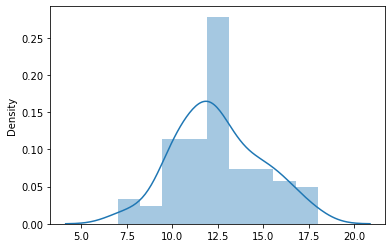

In [ ]:
Q_Learning_counts = count(qtable)
Q_counts = [count(qtable) for i in range(100)]
print("Agent yang menggunakan policy yang telah ditingkatkan dengan Q-learning membutuhkan rata-rata " + str(int(np.mean(Q_counts)))
      + " timesteps untuk menyelesaikan setiap episodenya.\n")
sns.distplot(Q_counts)

### Plot performa untuk setiap episodes

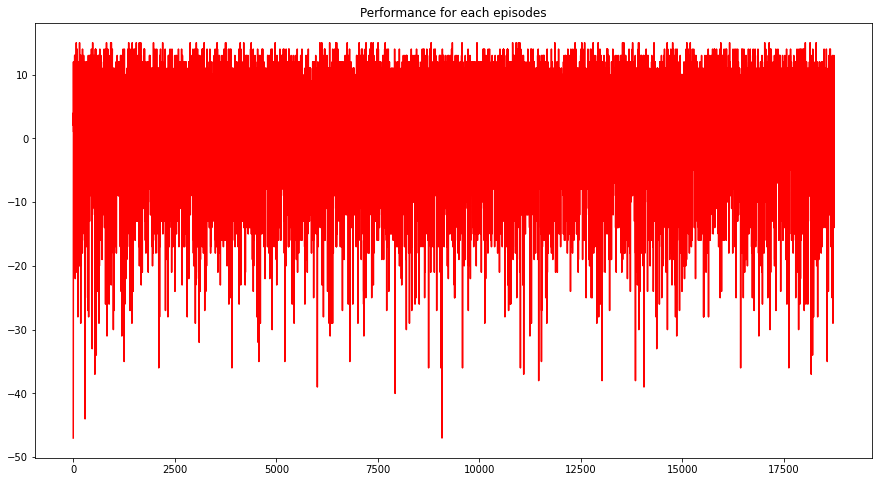

In [ ]:
list_episode = list(range(len(score_per_episode)))
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Performance for each episodes")
plt.plot(list_episode, score_per_episode, color='r')
plt.show()